In [6]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
f = netCDF4.Dataset('data/sst.mnmean.nc')
print(f.variables.keys()) # get all variable names
sst = f.variables['sst'] # sst variable
time = f.variables['time']
print(time)

dict_keys(['lat', 'lon', 'sst', 'time', 'time_bnds'])
<class 'netCDF4.Variable'>
float64 time(time)
    units: days since 1800-1-1 00:00:00
    long_name: Time
    actual_range: [66443. 81449.]
    delta_t: 0000-01-00 00:00:00
    avg_period: 0000-01-00 00:00:00
    prev_avg_period: 0000-00-07 00:00:00
    standard_name: time
    axis: T
    bounds: time_bnds
unlimited dimensions: time
current shape = (494,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [21]:
## Workflow from GPT to get SST from a specific time range around a specific coordinate (Helheim)

# Define the file path to your dataset
file_path = "data/sst.mnmean.nc"

# Step 1: Load the dataset
dataset = xr.open_dataset(file_path)

# Variables of interest
sst = dataset['sst']  # Sea surface temperature
lat = dataset['lat']  # Latitude dimension
lon = dataset['lon']  # Longitude dimension
time = dataset['time']  # Time dimension

# Decode time (xarray usually handles this automatically)
sst = xr.decode_cf(dataset)

# Step 2: Subset the data for the region near Helheim Glacier
#lat_range = slice(64.2, 64.8)  # Slight buffer around 64'41'14" (64.69)
#lon_range = slice(-37.5 + 360, -36.5 + 360)  # Convert W longitude to 0-360 scale

# Dummy check for open N Atlantic ocean
lat_range = slice(60, 61)  # Slight buffer around 64'41'14" (64.69)
lon_range = slice(-30 + 360, -31 + 360)  # Convert W longitude to 0-360 scale
sst_helheim = sst.sel(lat=lat_range, lon=lon_range)

# Step 3: Define the specific time range
start_date = '2014-01-01'
end_date = '2023-01-01'
sst_time_filtered = sst_helheim.sel(time=slice(start_date, end_date))

# Step 4: Compute the spatial mean over lat and lon
# This ensures we average only lat and lon, keeping the time dimension intact
sst_mean = sst_time_filtered.mean(dim=['lat', 'lon'])

# Convert `sst_mean` to a NumPy array
sst_mean_values = sst_mean.values  # Extract NumPy array for plotting
time_index = pd.to_datetime(sst_time_filtered['time'].values)  # Ensure time is correct

# Check shapes for debugging
print(f"time_index shape: {time_index.shape}")
print(f"sst_mean_values shape: {sst_mean_values.shape}")

# Step 5: Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(time_index, sst_mean_values, label='Helheim Glacier SST', color='blue')
plt.xlabel('Year')
plt.ylabel('Sea Surface Temperature (°C)')
plt.title('Sea Surface Temperature near Helheim Glacier (2014-2023)')
plt.legend()
plt.grid(True)
plt.show()



time_index shape: (109,)


AttributeError: 'function' object has no attribute 'shape'

Debug: sst_mean type and value
<class 'xarray.core.dataarray.DataArray'>
<xarray.DataArray 'sst' (time: 109)> Size: 436B
array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 872B 2014-01-01 2014-02-01 ... 2023-01-01
Debug: sst_mean_values type and shape
<class 'numpy.ndarray'>
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan n

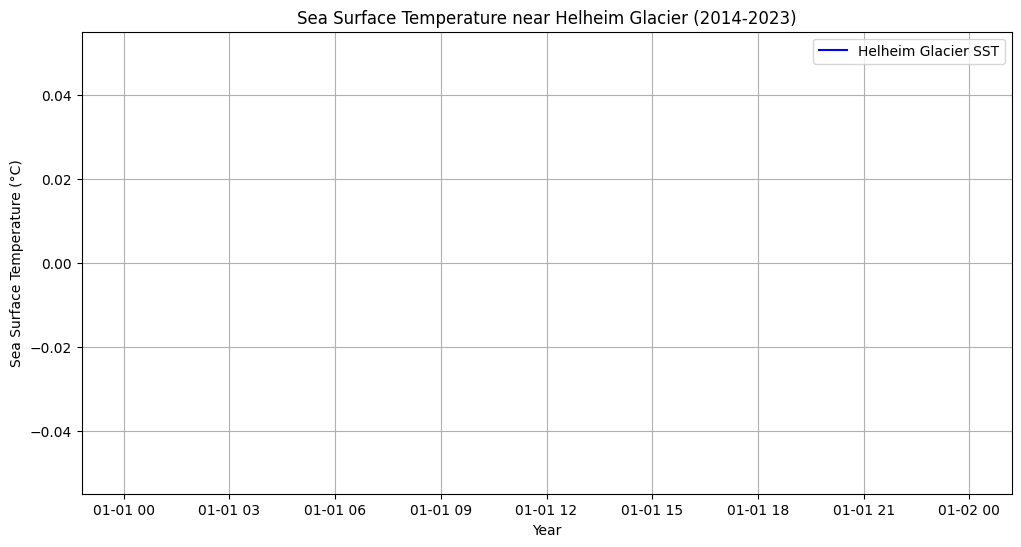

In [25]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define the file path to your dataset
file_path = "data/sst.mnmean.nc"

# Step 1: Load the dataset
dataset = xr.open_dataset(file_path)

# Explicitly select the 'sst' variable as a DataArray
sst = dataset['sst']

# Step 2: Subset the data for the region near Helheim Glacier
# Dummy check for open N Atlantic ocean
lat_range = slice(60, 61)  # Slight buffer around 64'41'14" (64.69)
lon_range = slice(-30 + 360, -31 + 360)  # Convert W longitude to 0-360 scale
sst_helheim = sst.sel(lat=lat_range, lon=lon_range)  # Ensure sst_helheim remains a DataArray

# Step 3: Define the specific time range
start_date = '2014-01-01'
end_date = '2023-01-01'
sst_time_filtered = sst_helheim.sel(time=slice(start_date, end_date))  # DataArray still ensured

# Step 4: Compute the spatial mean over lat and lon
sst_mean = sst_time_filtered.mean(dim=['lat', 'lon'])  # Keep result as a DataArray

# Debug: Check the type of sst_mean
print("Debug: sst_mean type and value")
print(type(sst_mean))  # Should be a DataArray
print(sst_mean)

# Convert `sst_mean` to a NumPy array for plotting
sst_mean_values = sst_mean.values

# Debug: Check that sst_mean_values is a NumPy array
print("Debug: sst_mean_values type and shape")
print(type(sst_mean_values))
print(sst_mean_values)

# Convert time to a pandas datetime index
time_index = pd.to_datetime(sst_time_filtered['time'].values)

# Debug: Check that time_index matches sst_mean_values
print("Debug: time_index type and shape")
print(type(time_index))
print(time_index)

# Step 5: Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(time_index, sst_mean_values, label='Helheim Glacier SST', color='blue')
plt.xlabel('Year')
plt.ylabel('Sea Surface Temperature (°C)')
plt.title('Sea Surface Temperature near Helheim Glacier (2014-2023)')
plt.legend()
plt.grid(True)
plt.show()


In [33]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define the file path to your dataset
file_path = "data/sst.mnmean.nc"

# Step 1: Load the dataset
dataset = xr.open_dataset(file_path)

# Inspect the time variable to understand how dates are stored
#print(dataset['time'])
#print(dataset['time'].values)  # Check exact timestamps in the dataset

# Variables of interest
sst = dataset['sst']  # Access the 'sst' variable directly as a DataArray

# Step 2: Subset the data for the region near Helheim Glacier
# Dummy check for open N Atlantic ocean
lat_range = slice(64, 66)  # Slight buffer around 64'41'14" (64.69)
lon_range = slice(-28 + 360, -33 + 360)  # Convert W longitude to 0-360 scale
sst_helheim = sst.sel(lat=60, lon=30, method='nearest')

# Step 3: Define the specific time range
# Use a broader filter to ensure all available monthly means are included
start_date = '2014-01-01'
end_date = '2023-01-01'
sst_time_filtered = sst_helheim.sel(time=slice(start_date, end_date))  # Slice the time dimension

print(sst_time_filtered)

# ^ ABOVE WORKS BETTER
'''
for timestamp in sst_time_filtered['time']:
    # Extract the data for the current timestamp
    data_at_time = sst_time_filtered.sel(time=timestamp)
    
    # Print the timestamp and the corresponding SST data
    print(f"Date: {timestamp.values}")
    print(data_at_time.values)
    print("-" * 40)  # Separator for readability
    

# Step 4: Compute the spatial mean over lat and lon
sst_mean = sst_time_filtered.mean(dim=['lat', 'lon'])

# Convert `sst_mean` to a NumPy array for plotting
sst_mean_values = sst_mean.values  # Extract NumPy array for plotting
time_index = pd.to_datetime(sst_time_filtered['time'].values)

# Debugging: Check for NaN values in sst_mean_values
print("Debug: sst_mean_values (after filtering and mean)")
print(sst_mean_values)

# Step 5: Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(time_index, sst_mean_values, label='Helheim Glacier SST', color='blue')
plt.xlabel('Year')
plt.ylabel('Sea Surface Temperature (°C)')
plt.title('Sea Surface Temperature near Helheim Glacier (2014-2023)')
plt.legend()
plt.grid(True)
plt.show()
'''

<xarray.DataArray 'sst' (time: 109)> Size: 436B
[109 values with dtype=float32]
Coordinates:
    lat      float32 4B 60.5
    lon      float32 4B 30.5
  * time     (time) datetime64[ns] 872B 2014-01-01 2014-02-01 ... 2023-01-01
Attributes: (12/13)
    long_name:             Monthly Mean of Sea Surface Temperature
    unpacked_valid_range:  [-5. 40.]
    actual_range:          [-1.7999996 35.56862  ]
    units:                 degC
    precision:             2
    var_desc:              Sea Surface Temperature
    ...                    ...
    level_desc:            Surface
    statistic:             Mean
    parent_stat:           Weekly Mean
    standard_name:         sea_surface_temperature
    cell_methods:          time: mean (monthly from weekly values interpolate...
    valid_range:           [-500 4000]


'\nfor timestamp in sst_time_filtered[\'time\']:\n    # Extract the data for the current timestamp\n    data_at_time = sst_time_filtered.sel(time=timestamp)\n    \n    # Print the timestamp and the corresponding SST data\n    print(f"Date: {timestamp.values}")\n    print(data_at_time.values)\n    print("-" * 40)  # Separator for readability\n    \n\n# Step 4: Compute the spatial mean over lat and lon\nsst_mean = sst_time_filtered.mean(dim=[\'lat\', \'lon\'])\n\n# Convert `sst_mean` to a NumPy array for plotting\nsst_mean_values = sst_mean.values  # Extract NumPy array for plotting\ntime_index = pd.to_datetime(sst_time_filtered[\'time\'].values)\n\n# Debugging: Check for NaN values in sst_mean_values\nprint("Debug: sst_mean_values (after filtering and mean)")\nprint(sst_mean_values)\n\n# Step 5: Plot the time series\nplt.figure(figsize=(12, 6))\nplt.plot(time_index, sst_mean_values, label=\'Helheim Glacier SST\', color=\'blue\')\nplt.xlabel(\'Year\')\nplt.ylabel(\'Sea Surface Temperatur

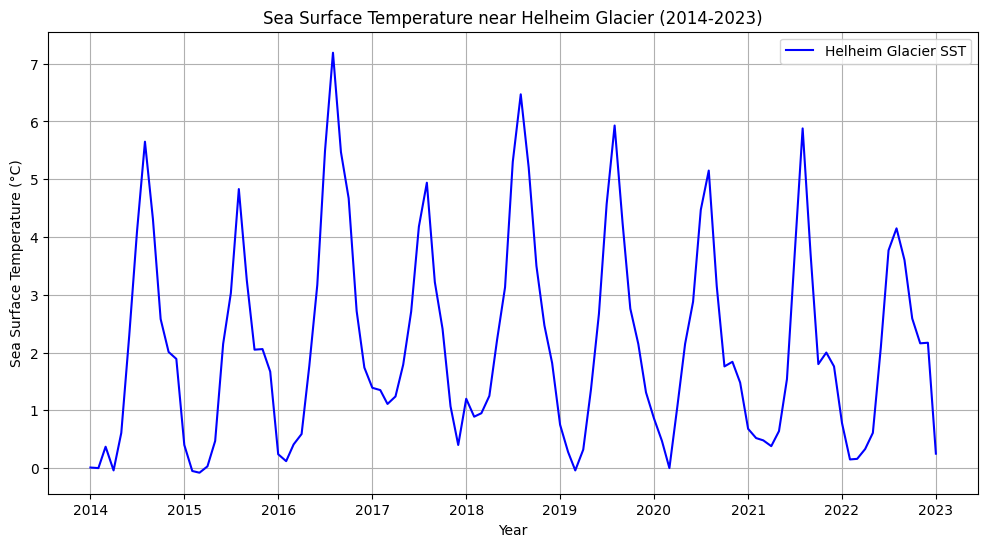

In [35]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define the file path to your dataset
file_path = "data/sst.mnmean.nc"

# Step 1: Load the dataset
dataset = xr.open_dataset(file_path)

# Variables of interest
sst = dataset['sst']  # Access the 'sst' variable directly as a DataArray

# Step 2: Select the nearest grid point to the specified coordinates
lat = 66  # Approximate latitude for Helheim Glacier
lon = -38.0 + 360  # Convert W longitude to 0-360 scale
sst_helheim = sst.sel(lat=lat, lon=lon, method='nearest')  # Use the nearest flag

# Step 3: Define the specific time range
start_date = '2014-01-01'
end_date = '2023-01-01'
sst_time_filtered = sst_helheim.sel(time=slice(start_date, end_date))

# Debug: Check raw data
'''
print("Raw SST data for the selected point:")
for timestamp in sst_time_filtered['time']:
    data_at_time = sst_time_filtered.sel(time=timestamp)
    print(f"Date: {timestamp.values}")
    print(data_at_time.values)
    print("-" * 40)
'''

# Step 4: Convert to NumPy arrays for plotting
sst_mean_values = sst_time_filtered.values  # Extract SST values
time_index = pd.to_datetime(sst_time_filtered['time'].values)  # Convert time to pandas datetime

# Step 5: Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(time_index, sst_mean_values, label='Helheim Glacier SST', color='blue')
plt.xlabel('Year')
plt.ylabel('Sea Surface Temperature (°C)')
plt.title('Sea Surface Temperature near Helheim Glacier (2014-2023)')
plt.legend()
plt.grid(True)
plt.show()
